In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# creating a step function
f = np.hstack((np.ones(64), np.zeros(64)))
f.shape

(128,)

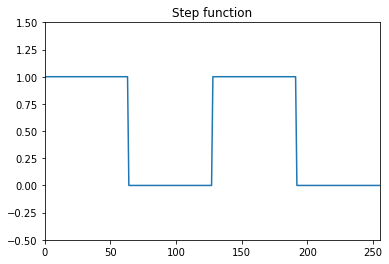

In [8]:
plt.figure()
plt.plot(np.hstack((f, f)))
plt.xlim([0, 255])
plt.ylim([-0.5, 1.5])
plt.title('Step function')
plt.show()
plt.close()

In [9]:
# DFT of f
F = np.fft.fft(f)

In [11]:
F.shape, F.dtype

((128,), dtype('complex128'))

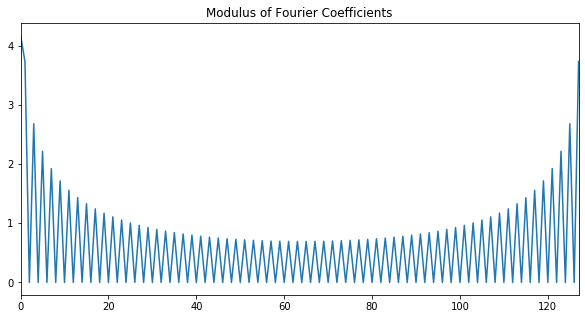

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(np.log(np.abs(F)+1)) # +1 to get rid of log(0)
plt.title('Modulus of Fourier Coefficients')
plt.xlim((0, F.shape[0]-1))
plt.show()
plt.close()

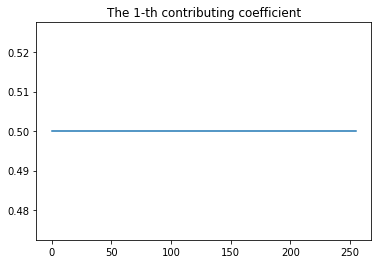

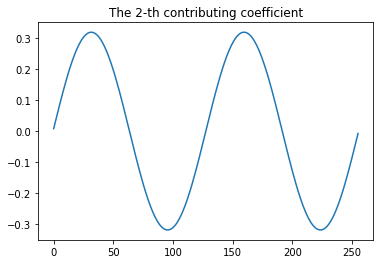

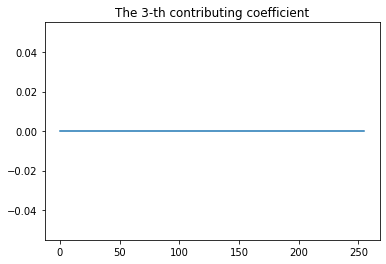

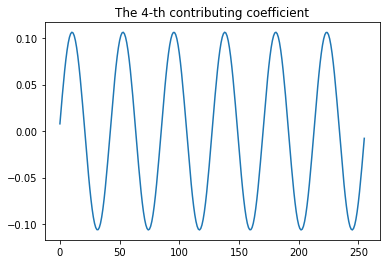

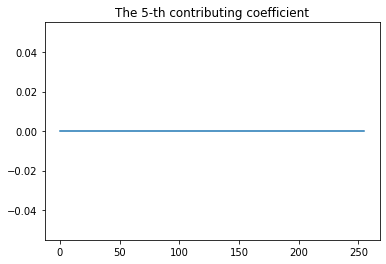

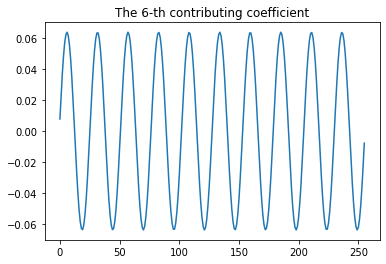

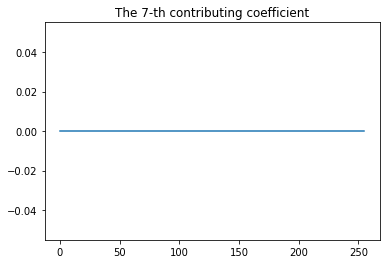

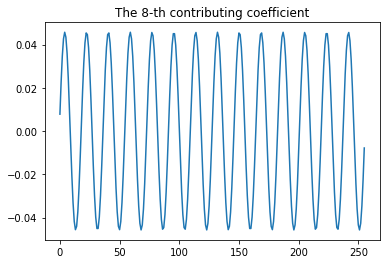

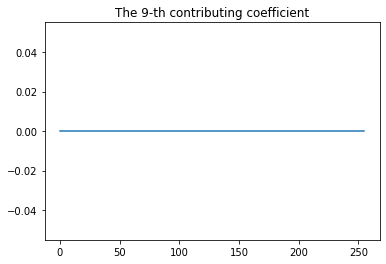

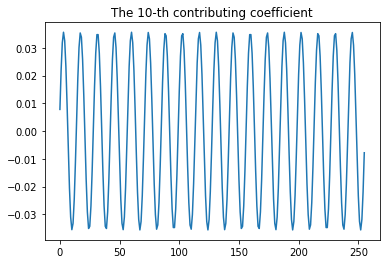

In [21]:
# draw some of the contributing trigonometric functions
for i in range(0,10):
    
    G = np.zeros_like(F)
    G[i] = F[i] # set all bu the first i to zero
    g = np.fft.ifft(G) # inverse DFT
    
    plt.figure()
    plt.plot(np.real(np.hstack((g, g))))
    plt.title('The {}-th contributing coefficient'.format(i+1))
    plt.show()
    plt.close()

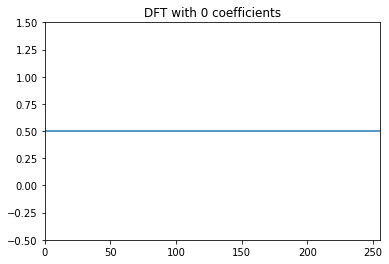

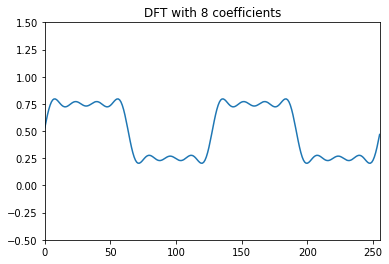

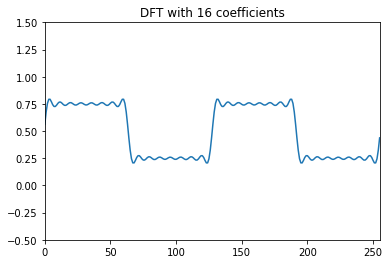

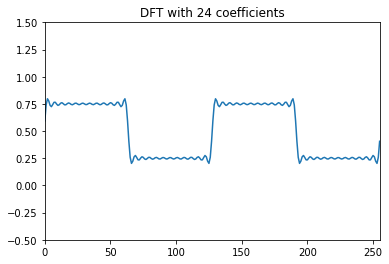

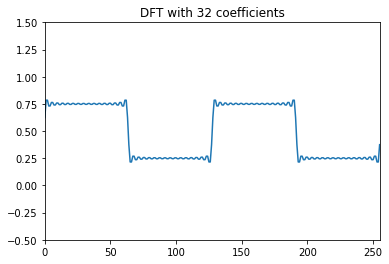

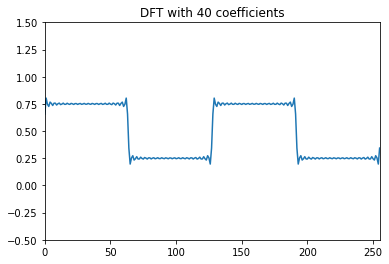

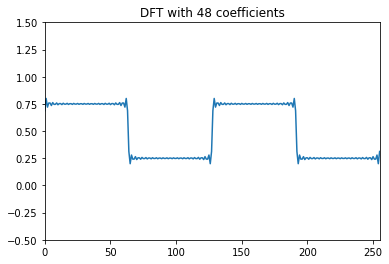

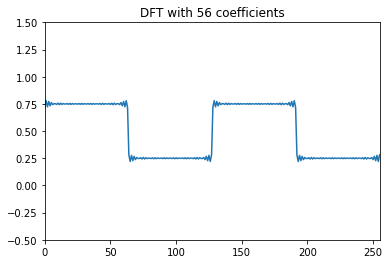

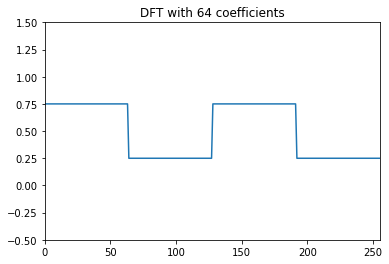

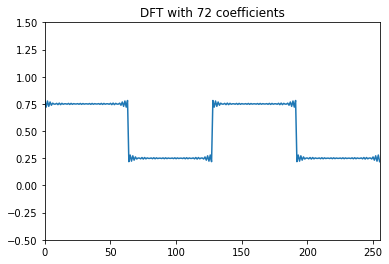

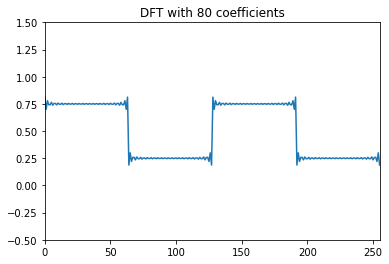

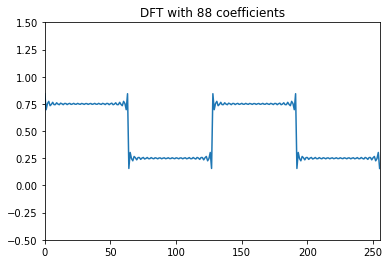

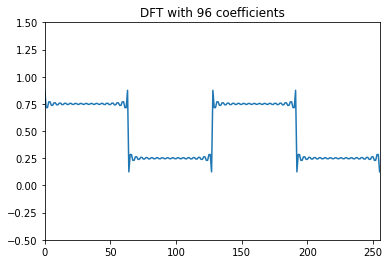

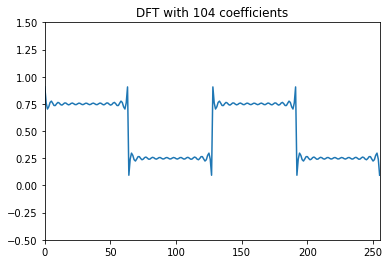

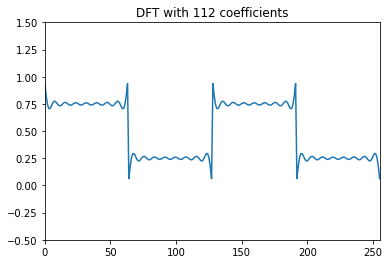

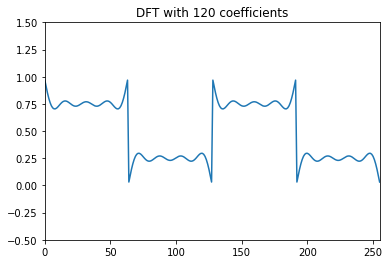

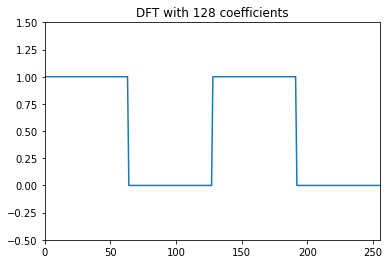

In [18]:
# draw some of the contributing trigonometric functions
for i in range(0,f.shape[0]+1,8):
    
    G = np.copy(F)
    G[i+1:] = 0 # set all bu the first i to zero
    g = np.fft.ifft(G) # inverse DFT
    
    plt.figure()
    plt.plot(np.real(np.hstack((g, g))))
    plt.title('DFT with {} coefficients'.format(i))
    plt.xlim([0, 255])
    plt.ylim([-0.5, 1.5])
    plt.show()
    plt.close()

In [22]:
import cv2

In [23]:
img = cv2.imread(r'./images/t1.jpg', cv2.IMREAD_GRAYSCALE)

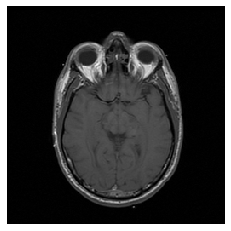

In [29]:
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

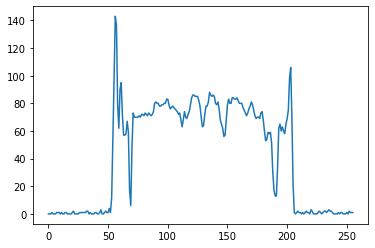

In [31]:
# considering a 1D sample
f = img[128, :]

plt.figure()
plt.plot(f)
plt.show()
plt.close()

In [32]:
f.dtype, f.shape

(dtype('uint8'), (256,))

In [33]:
f = f.astype(np.double)
f.dtype

dtype('float64')

In [34]:
F = np.fft.fft(f) # DFT of f

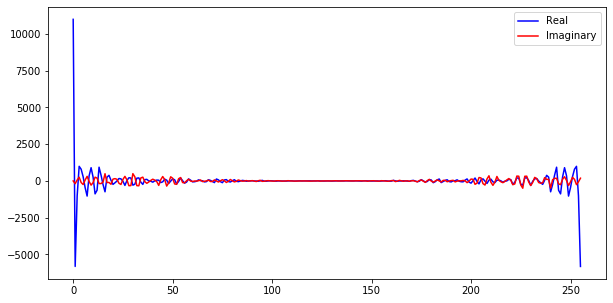

In [36]:
# Viewing the Fourier coefficients
plt.figure(figsize=(10,5))
plt.plot(np.real(F), 'b')
plt.plot(np.imag(F), 'r')
plt.legend(['Real', 'Imaginary'])
plt.show()
plt.close()

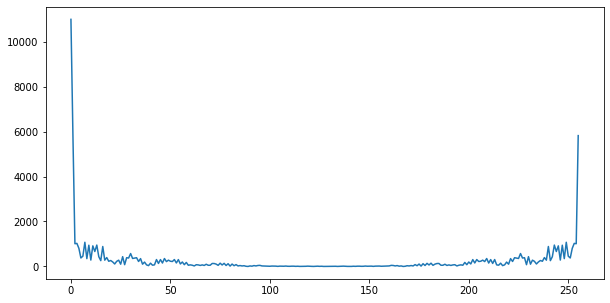

In [37]:
# Plots the modulus of the Fourier coefs
plt.figure(figsize=(10,5))
plt.plot(np.abs(F))
plt.show()
plt.close()

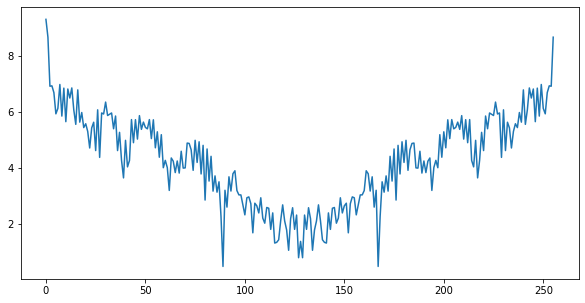

In [38]:
# Plot the log of the (modulus+1)
plt.figure(figsize=(10,5))
plt.plot(np.log(np.abs(F)+1))
plt.show()
plt.close()

In [39]:
# Zero-shifting
# shift the DC to the middle
F_z = np.fft.fftshift(F)

`Y = fftshift(X)` rearranges the outputs of `fft`, `fft2`, and `fftn` by moving
the zero-frequency component to the center of the array. It is useful for
visualizing a Fourier transform with the zero-frequency component in the
middle of the spectrum. For vectors, `fftshift(X)` swaps the left and right halves
of `X`.
`fft` transforms input images into frequency domain; while
`fftshift` reorganize the outputs of `fft` by moving zeroth lag to the center of
spectrum. Thus, `fftshift` is usually used together with the Fourier transform. 
If you need to shift frequency components to be
visually clearer (not necessary always), use `fftshift` after `fft`. 
The function can be constructed via multiplying pixel `(x,y)` of `f` by `(-1)^(x+y)`.

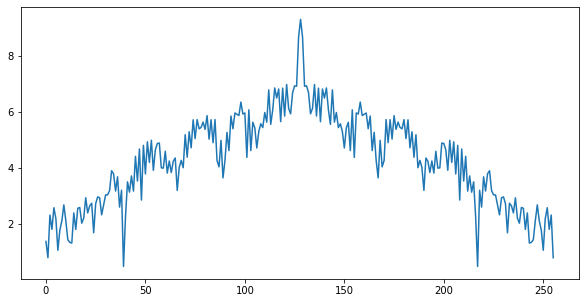

In [40]:
# Plot the log of the (modulus+1)
plt.figure(figsize=(10,5))
plt.plot(np.log(np.abs(F_z)+1))
plt.show()
plt.close()

In [43]:
even_array = np.asarray([1, 2, 3, 4]) # array of length 4
even_array_z = np.fft.fftshift(even_array)
even_array_z

array([3, 4, 1, 2])

In [44]:
odd_array = np.asarray([1, 2, 3, 4, 5, 6, 7]) # array of length 5
odd_array_z = np.fft.fftshift(odd_array)
odd_array_z

array([5, 6, 7, 1, 2, 3, 4])

In [46]:
even_ctr = even_array.shape[0] // 2
even_ctr

2

In [48]:
odd_ctr = (odd_array.shape[0]-1) // 2
odd_ctr

3

In [49]:
even_array_z[even_ctr], odd_array_z[odd_ctr]

(1, 1)

In [50]:
# Now, to undo it, we use ifftshift because it behaves differently with even- and odd-length arrays (just like fftshift).
np.fft.ifftshift(even_array_z)

array([1, 2, 3, 4])

In [51]:
np.fft.ifftshift(odd_array_z)

array([1, 2, 3, 4, 5, 6, 7])

In [52]:
# 2D DFT, Use fft2 instead of fft.
img.dtype

dtype('uint8')

In [54]:
img = img.astype(np.double)
img.dtype

dtype('float64')

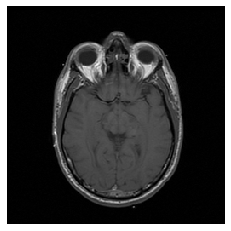

In [55]:
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [56]:
IMG = np.fft.fft2(img)

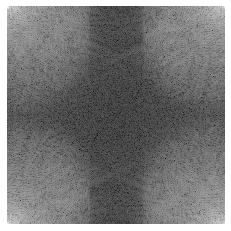

In [57]:
plt.figure()
plt.imshow(np.log(np.abs(IMG)+1), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

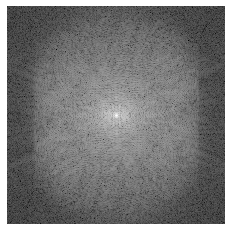

In [58]:
IMG_z = np.fft.fftshift(IMG)

plt.figure()
plt.imshow(np.log(np.abs(IMG_z)+1), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [64]:
ctr_position = np.asarray(IMG_z.shape) // 2
IMG_z.shape, ctr_position, IMG_z[ctr_position[0], ctr_position[1]], np.max(IMG_z)

((256, 256), array([128, 128]), (1937351+0j), (1937351+0j))

In [65]:
# Your own 2D DFT
# 1D DFT of columns first
Img_col = np.fft.fft(img) # fft works on columns by default

# Then 1D DFT of rows
Img2 = np.fft.fft(Img_col, axis=1); # apply DFT along dim 1 (rows)

# Compare ours to the one from fft2
diff = np.abs(IMG-Img2) # should be close to zero
np.max(diff.ravel()) # make it a column, then find max of col

1937351.0

In [86]:
# Create convolution kernel, g
# Let's create a circle centred in a 256x256 image.
r, c = np.meshgrid(np.arange(-128,128), np.arange(-128,128)) # vert & horiz ramps
d = np.sqrt(r ** 2 + c ** 2) # distance from centre pixel
g = d < 15 # select pixels less than 15 pixels from centre
g = np.fft.fftshift(g) # centre g at (1,1) (top-left)
g[1:22,1:5] = 1 # add a little tail so we can determine orientation

In [87]:
# Get its DFT
G = np.fft.fft2(g)

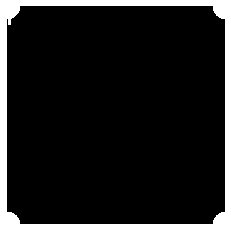

In [88]:
plt.figure()
plt.imshow(g, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [90]:
f = np.zeros((256,256))
f[50,100] = 1
f[48,120] = 2

In [91]:
F = np.fft.fft2(f);

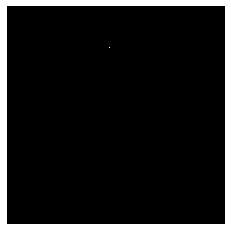

In [92]:
plt.figure()
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [93]:
f_conv_g = np.fft.ifft2(F * G)

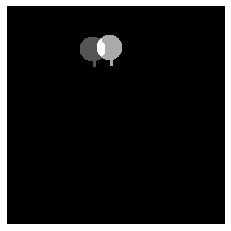

In [94]:
plt.figure()
plt.imshow(np.abs(f_conv_g), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [95]:
f2 = cv2.imread(r'./images/pd.jpg', cv2.IMREAD_GRAYSCALE)
f2 = f2.astype(np.double)

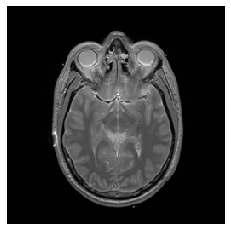

In [96]:
plt.figure()
plt.imshow(f2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [97]:
F2 = np.fft.fft2(f2)

In [98]:
f2_conv_g = np.fft.ifft2(F2 * G)

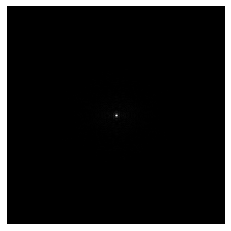

In [101]:
plt.figure()
plt.imshow(np.abs(np.fft.fftshift(F2)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

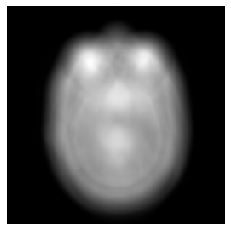

In [103]:
plt.figure()
plt.imshow(np.abs(f2_conv_g), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [105]:
# aliasing
r, c = np.meshgrid(np.arange(1,257), np.arange(1,257))
# creating a simple left-right wave front
f = np.sin(2 * np.pi * c / 256 * 40)

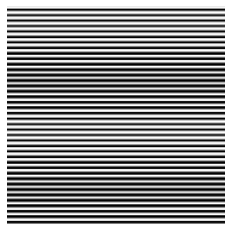

In [106]:
plt.figure()
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [107]:
g = f[::5,::5] # sampling every 5th entries

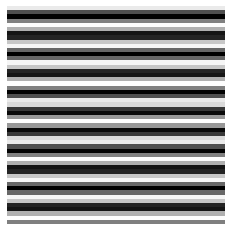

In [108]:
plt.figure()
plt.imshow(g, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [109]:
# Bricks moire demo
q = cv2.imread(r'./images/bricks.jpg', cv2.IMREAD_GRAYSCALE)
q = q.astype(np.double)

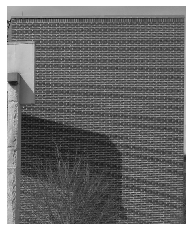

In [116]:
plt.figure()
plt.imshow(q, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [140]:
q.shape

(756, 622)

In [121]:
# resize by simple sub-sampling
ratio = 0.2
new_size = tuple([int(i * ratio) for i in q.shape])
q_small = cv2.resize(q, new_size)

In [141]:
new_size

(151, 124)

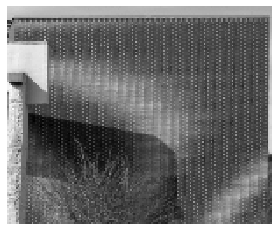

In [122]:
plt.figure()
plt.imshow(q_small, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [136]:
# resize, but first blur it (apply a filter)
q_blur = cv2.GaussianBlur(q, (11,11), 2)

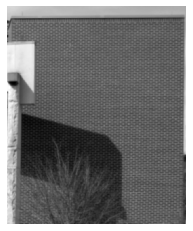

In [137]:
plt.figure()
plt.imshow(q_blur, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [138]:
q_blur_small = cv2.resize(q_blur, new_size)

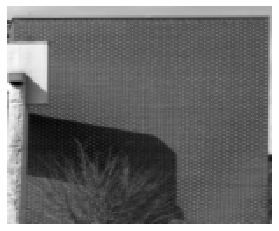

In [139]:
plt.figure()
plt.imshow(q_blur_small, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [142]:
Q = np.fft.fft2(q)
Q_z = np.fft.fftshift(Q)

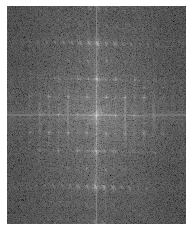

In [152]:
plt.figure()
plt.imshow(np.log(1+np.abs(Q_z)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [146]:
Q_s = np.fft.fft2(q_small)
Q_s_z = np.fft.fftshift(Q_s)

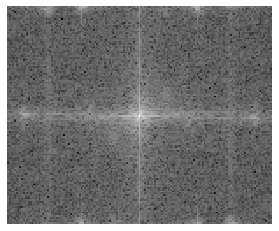

In [153]:
plt.figure()
plt.imshow(np.log(1+np.abs(Q_s_z)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [148]:
Q_b = np.fft.fft2(q_blur)
Q_b_z = np.fft.fftshift(Q_b)

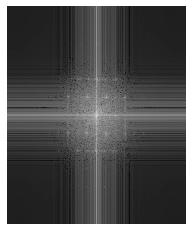

In [154]:
plt.figure()
plt.imshow(np.log(1+np.abs(Q_b_z)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [150]:
Q_b_s = np.fft.fft2(q_blur_small)
Q_b_s_z = np.fft.fftshift(Q_b_s)

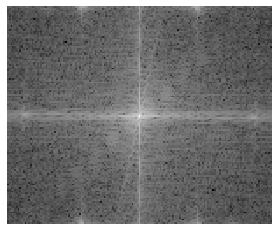

In [155]:
plt.figure()
plt.imshow(np.log(1+np.abs(Q_b_s_z)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [177]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[4,0] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

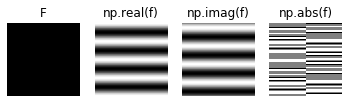

In [178]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [179]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[3,0] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

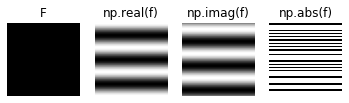

In [180]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [181]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[0,5] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

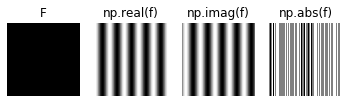

In [182]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [183]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[0,0] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

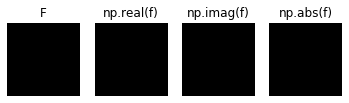

In [184]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [185]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[1,0] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

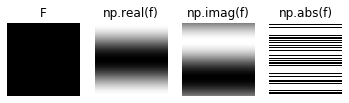

In [186]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [187]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[1,1] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

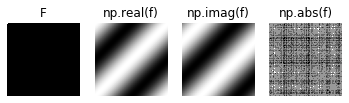

In [188]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [189]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[2,2] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

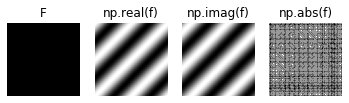

In [190]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [191]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[2,1] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

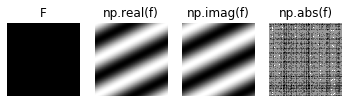

In [192]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [193]:
# Fourier 2D wavefront
F = np.zeros((256,256))
F[1,2] = 1 # choosing one element to be non-zero

f = np.fft.ifft2(F) # taking the iFFT

<Figure size 432x288 with 0 Axes>

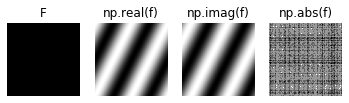

In [194]:
plt.figure()
fig, axes = plt.subplots(1,4)
axes[0].imshow(F, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('F')

axes[1].imshow(np.real(f), cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('np.real(f)')

axes[2].imshow(np.imag(f), cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('np.imag(f)')

axes[3].imshow(np.abs(f), cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('np.abs(f)')

plt.show()
plt.close()

In [195]:
# Image scaling by DFT
f = cv2.imread(r'./images/ct.jpg', cv2.IMREAD_GRAYSCALE)
f = f.astype(np.double)
f.shape, f.dtype

((256, 256), dtype('float64'))

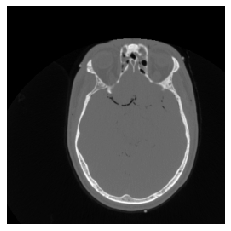

In [196]:
plt.figure()
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [197]:
F = np.fft.fft2(f)
F_z = np.fft.fftshift(F)

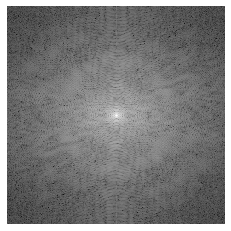

In [198]:
plt.figure()
plt.imshow(np.log(1+np.abs(F_z)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [199]:
rows, cols = f.shape

In [204]:
padamount = rows // 2 # how much pad on each side
G = np.pad(F_z, ((padamount, padamount), (padamount, padamount)), mode='constant', constant_values=((0,0),(0,0)))

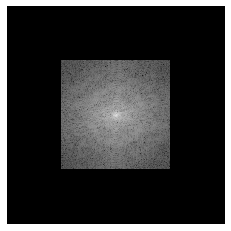

In [205]:
plt.figure()
plt.imshow(np.log(1+np.abs(G)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [206]:
g = np.fft.ifft2( np.fft.fftshift(G) )

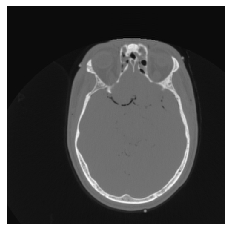

In [207]:
plt.figure()
plt.imshow(np.real(g), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [208]:
g.shape

(512, 512)

In [209]:
# it's a scaled up version of the original image by a factor of 2
g_crop = g[padamount:padamount+rows, padamount:padamount+rows]

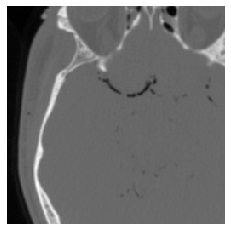

In [210]:
plt.figure()
plt.imshow(np.real(g_crop), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()